In [2]:
import tensorflow as tf

import os 
os.chdir('E:\\Blanco_Avesh')
import pandas as pd
import numpy as np
model_1D_CNN = tf.keras.models.load_model("CD_HIT_1D_CNN_Pujan_Prot_T5_Check_Actual_File2882281.h5")

In [3]:
import pickle
file = open("CD_HIT_Logisitc_Regression_Pujan_Prot_T5_Check_Actual_File98696151.h5",'rb')
model_logistic_regression = pickle.load(file)

C:\Users\pakhrins\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator LogisticRegression from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [4]:
model = tf.keras.models.load_model('Subash_Chandra_Pakhrin5775457372.h5')

In [5]:
fINAL_df = pd.read_csv("Final_independent_test_dataset_of_SUMOylation_PTM.csv")

fINAL_df = fINAL_df.drop(["Unnamed: 0"],axis=1)

model = tf.keras.models.load_model('Subash_Chandra_Pakhrin5775457372.h5')


test = fINAL_df.iloc[:,:-4]

X_independent = np.array(test)

y_independent = np.array(fINAL_df["Label"])

In [9]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report,auc
import matplotlib.pyplot as plt

187/187 [==============================] - 0s 767us/step


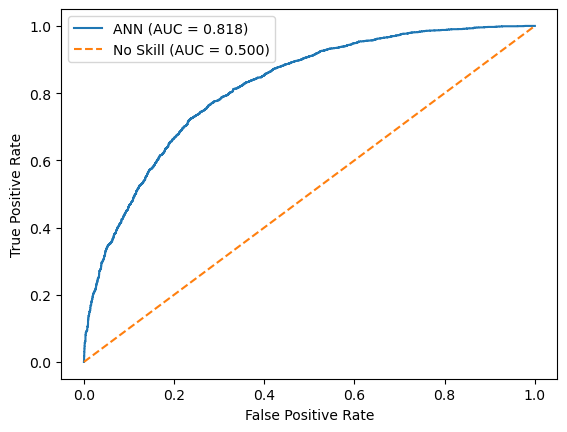

In [10]:
%matplotlib inline
Y_pred = model.predict(X_independent)
Y_pred = (Y_pred > 0.5)
y_pred = [np.argmax(y, axis=None, out=None) for y in Y_pred]
y_pred = np.array(y_pred)

y_pred_ANN = y_pred
ANN_model_Prob = model.predict(X_independent)
# keep probabilities for the positive outcome only
ANN_model_Prob = ANN_model_Prob[:,1]

ANN_model_Prob_auc = roc_auc_score(y_independent, ANN_model_Prob)

# plot the roc curve for the model
ns_probs = [0 for _ in range(len(ANN_model_Prob))]

# calculate scores
ns_auc = roc_auc_score(y_independent, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_independent, ns_probs)

ANN_model_fpr, ANN_model_tpr, _ = roc_curve(y_independent, ANN_model_Prob)

plt.plot(ANN_model_fpr, ANN_model_tpr,  label='ANN (AUC = %0.3f)' % ANN_model_Prob_auc)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill (AUC = %0.3f)' % ns_auc)

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.savefig('After_CD_HIT_Sumoylation_ROC.png', dpi=350, bbox_inches='tight')
plt.show()

187/187 [==============================] - 4s 21ms/step


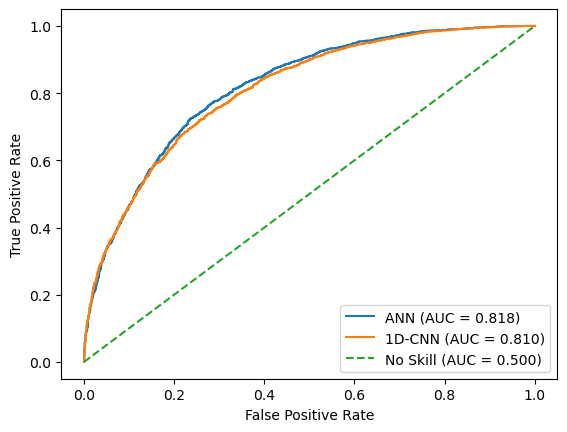

In [11]:
%matplotlib inline
X_independent = X_independent.reshape(X_independent.shape[0],1024,1)
Y_pred_1D_CNN = model_1D_CNN.predict(X_independent)
Y_pred_1D_CNN = (Y_pred_1D_CNN > 0.5)
y_pred_1D_CNN = [np.argmax(y, axis=None, out=None) for y in Y_pred_1D_CNN]
y_pred_1D_CNN = np.array(y_pred_1D_CNN)

One_D_CNN_model_Prob = model_1D_CNN.predict(X_independent)
# keep probabilities for the positive outcome only
One_D_CNN_model_Prob = One_D_CNN_model_Prob[:,1]

One_D_CNN_model_Prob_model_Prob_auc = roc_auc_score(y_independent, One_D_CNN_model_Prob)

# plot the roc curve for the model
ns_probs = [0 for _ in range(len(One_D_CNN_model_Prob))]

# calculate scores
ns_auc = roc_auc_score(y_independent, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_independent, ns_probs)

One_D_CNN_model_fpr, One_D_CNN_model_tpr, _ = roc_curve(y_independent, One_D_CNN_model_Prob)

plt.plot(ANN_model_fpr, ANN_model_tpr,  label='ANN (AUC = %0.3f)' % ANN_model_Prob_auc)
plt.plot(One_D_CNN_model_fpr, One_D_CNN_model_tpr,  label='1D-CNN (AUC = %0.3f)' % One_D_CNN_model_Prob_model_Prob_auc)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill (AUC = %0.3f)' % ns_auc)


# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.savefig('After_CD_HIT_Sumoylation_ROC.png', dpi=350, bbox_inches='tight')
plt.show()

In [13]:
fINAL_df = pd.read_csv("Final_independent_test_dataset_of_SUMOylation_PTM.csv")

fINAL_df = fINAL_df.drop(["Unnamed: 0"],axis=1)

model = tf.keras.models.load_model('Subash_Chandra_Pakhrin5775457372.h5')


test = fINAL_df.iloc[:,:-4]

X_independent = np.array(test)

y_independent = np.array(fINAL_df["Label"])

print(X_independent.shape,y_independent.shape)

(5975, 1024) (5975,)


(5975, 1024) (5975,)


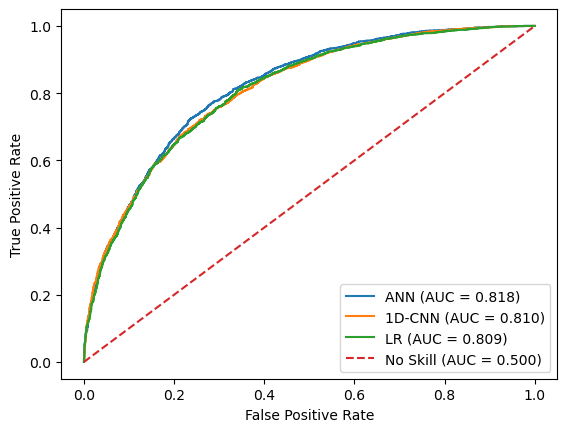

In [14]:
%matplotlib inline

print(X_independent.shape, y_independent.shape)

y_lr_prob = model_logistic_regression.predict_proba(X_independent)[:,1]

lr_model_Prob_auc = roc_auc_score(y_independent, y_lr_prob)

# plot the roc curve for the model
ns_probs = [0 for _ in range(len(y_lr_prob))]

# calculate scores
ns_auc = roc_auc_score(y_independent, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_independent, ns_probs)

lr_model_fpr, lr_model_tpr, _ = roc_curve(y_independent, y_lr_prob)


plt.plot(ANN_model_fpr, ANN_model_tpr,  label='ANN (AUC = %0.3f)' % ANN_model_Prob_auc)
plt.plot(One_D_CNN_model_fpr, One_D_CNN_model_tpr,  label='1D-CNN (AUC = %0.3f)' % One_D_CNN_model_Prob_model_Prob_auc)
plt.plot(lr_model_fpr, lr_model_tpr,  label='LR (AUC = %0.3f)' % lr_model_Prob_auc)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill (AUC = %0.3f)' % ns_auc)


# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.savefig('After_CD_HIT_Sumoylation_ROC.png', dpi=350, bbox_inches='tight')
plt.show()

In [15]:
import pickle
file = open("SUMO_SVM_C_0.1_Zeropoint1_Probability_True.pkl",'rb')
model_svm = pickle.load(file)

C:\Users\pakhrins\AppData\Local\anaconda3\lib\site-packages\sklearn\base.py:299: UserWarning: Trying to unpickle estimator SVC from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [16]:
%matplotlib inline

print(X_independent.shape, y_independent.shape)

y_svm_prob = model_svm.predict_proba(X_independent)[:,1]

svm_model_Prob_auc = roc_auc_score(y_independent, y_svm_prob)

# plot the roc curve for the model
ns_probs = [0 for _ in range(len(y_svm_prob))]

# calculate scores
ns_auc = roc_auc_score(y_independent, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_independent, ns_probs)

svm_model_fpr, svm_model_tpr, _ = roc_curve(y_independent, y_svm_prob)

(5975, 1024) (5975,)


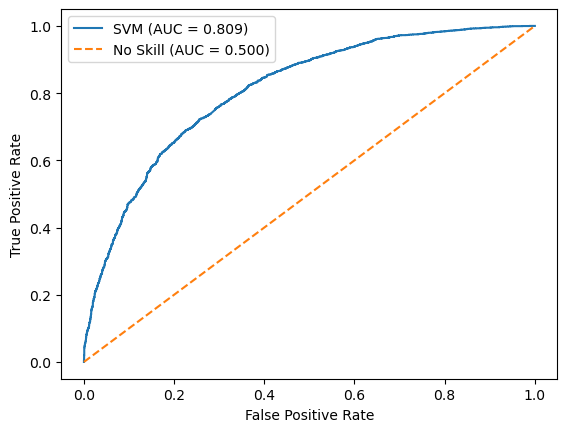

In [17]:
plt.plot(svm_model_fpr, svm_model_tpr,  label='SVM (AUC = %0.3f)' % svm_model_Prob_auc)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill (AUC = %0.3f)' % ns_auc)


# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.savefig('After_CD_HIT_Sumoylation_ROC_SVM.png', dpi=350, bbox_inches='tight')
plt.show()

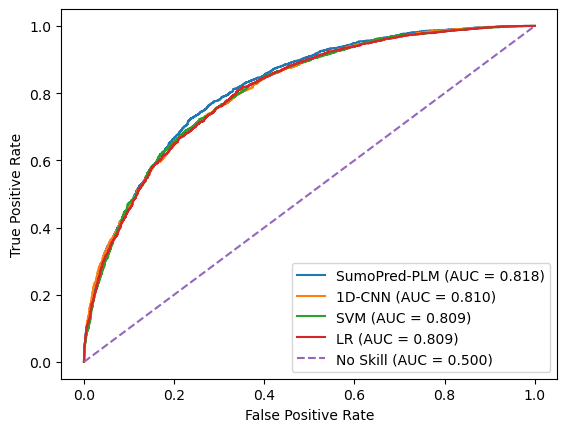

In [30]:
plt.plot(ANN_model_fpr, ANN_model_tpr,  label='SumoPred-PLM (AUC = %0.3f)' % ANN_model_Prob_auc)
plt.plot(One_D_CNN_model_fpr, One_D_CNN_model_tpr,  label='1D-CNN (AUC = %0.3f)' % One_D_CNN_model_Prob_model_Prob_auc)
plt.plot(svm_model_fpr, svm_model_tpr,  label='SVM (AUC = %0.3f)' % svm_model_Prob_auc)
plt.plot(lr_model_fpr, lr_model_tpr,  label='LR (AUC = %0.3f)' % lr_model_Prob_auc)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill (AUC = %0.3f)' % ns_auc)


# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.savefig('SumoPred-PLM_CD_HIT_Sumoylation_ROC.png', dpi=350, bbox_inches='tight')
plt.show()

# PR AUC Curve

187/187 [==============================] - 0s 794us/step


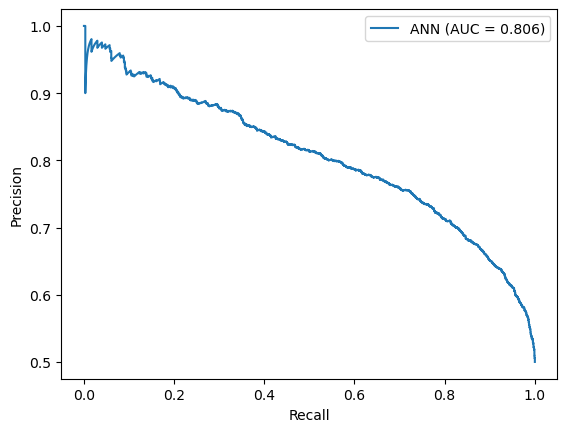

In [20]:
%matplotlib inline
from sklearn.metrics import precision_recall_curve
Y_pred = model.predict(X_independent)
Y_pred = (Y_pred > 0.5)
y_pred = [np.argmax(y, axis=None, out=None) for y in Y_pred]
y_pred = np.array(y_pred)

y_pred_ANN = y_pred
ANN_model_Prob = model.predict(X_independent)
# keep probabilities for the positive outcome only
ANN_model_Prob = ANN_model_Prob[:,1]



ANN_model_precision, ANN_model_recall, _ = precision_recall_curve(y_independent, ANN_model_Prob)

ANN_model_auc = auc(ANN_model_recall, ANN_model_precision)

plt.plot(ANN_model_recall, ANN_model_precision,  label='ANN (AUC = %0.3f)' % ANN_model_auc)

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.savefig('CD_HIT_Sumoylation_PR_Curve.png', dpi=350, bbox_inches='tight')
plt.show()

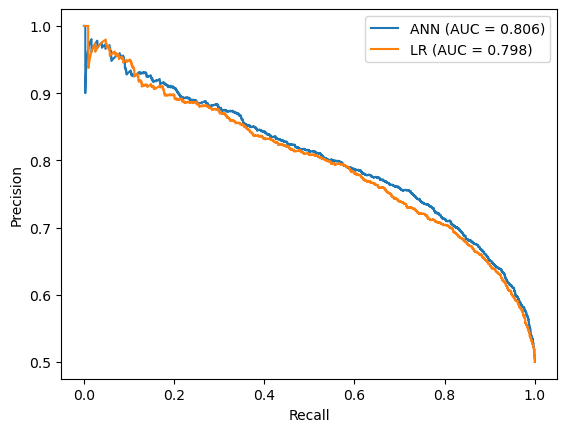

In [21]:
%matplotlib inline

lr_model_Prob = model_logistic_regression.predict_proba(X_independent)
# keep probabilities for the positive outcome only
lr_model_Prob = lr_model_Prob[:,1]

lr_model_precision, lr_model_recall, _ = precision_recall_curve(y_independent, lr_model_Prob)

lr_model_auc = auc(lr_model_recall, lr_model_precision)

plt.plot(ANN_model_recall, ANN_model_precision,  label='ANN (AUC = %0.3f)' % ANN_model_auc)
plt.plot(lr_model_recall, lr_model_precision,  label='LR (AUC = %0.3f)' % lr_model_auc)

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.savefig('CD_HIT_Sumoylation_PR_Curve.png', dpi=350, bbox_inches='tight')
plt.show()

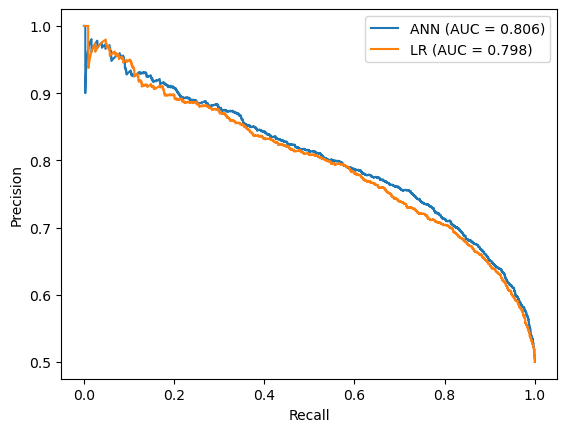

In [22]:
%matplotlib inline

lr_model_Prob = model_logistic_regression.predict_proba(X_independent)
# keep probabilities for the positive outcome only
lr_model_Prob = lr_model_Prob[:,1]

lr_model_precision, lr_model_recall, _ = precision_recall_curve(y_independent, lr_model_Prob)

lr_model_auc = auc(lr_model_recall, lr_model_precision)

plt.plot(ANN_model_recall, ANN_model_precision,  label='ANN (AUC = %0.3f)' % ANN_model_auc)
plt.plot(lr_model_recall, lr_model_precision,  label='LR (AUC = %0.3f)' % lr_model_auc)

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.savefig('CD_HIT_Sumoylation_PR_Curve.png', dpi=350, bbox_inches='tight')
plt.show()

In [23]:
%matplotlib inline
X_independent_reshaped = X_independent.reshape(X_independent.shape[0],1024,1)

187/187 [==============================] - 4s 20ms/step


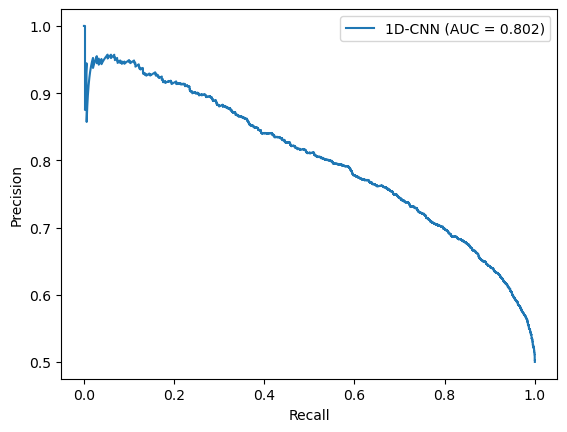

In [24]:
%matplotlib inline
Y_pred = model_1D_CNN.predict(X_independent_reshaped)
Y_pred = (Y_pred > 0.5)
y_pred = [np.argmax(y, axis=None, out=None) for y in Y_pred]
y_pred = np.array(y_pred)

y_pred_ANN = y_pred
One_D_CNN_model_Prob = model_1D_CNN.predict(X_independent_reshaped)
# keep probabilities for the positive outcome only
One_D_CNN_model_Prob = One_D_CNN_model_Prob[:,1]



One_D_CNN_model_precision, One_D_CNN_model_recall, _ = precision_recall_curve(y_independent, One_D_CNN_model_Prob)

One_D_CNN_model_auc = auc(One_D_CNN_model_recall, One_D_CNN_model_precision)

plt.plot(One_D_CNN_model_recall, One_D_CNN_model_precision,  label='1D-CNN (AUC = %0.3f)' % One_D_CNN_model_auc)

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.savefig('CD_HIT_Sumoylation_PR_Curve.png', dpi=350, bbox_inches='tight')
plt.show()

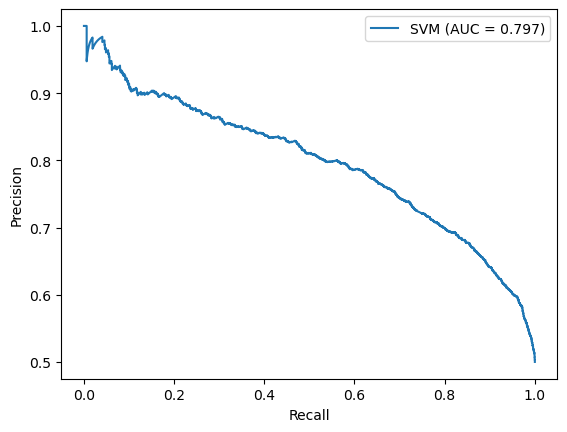

In [25]:
%matplotlib inline


svm_model_precision, svm_model_recall, _ = precision_recall_curve(y_independent, y_svm_prob)

svm_model_auc = auc(svm_model_recall, svm_model_precision)

plt.plot(svm_model_recall, svm_model_precision,  label='SVM (AUC = %0.3f)' % svm_model_auc)

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.savefig('CD_HIT_Sumoylation_PR_Curve_SVM.png', dpi=350, bbox_inches='tight')
plt.show()

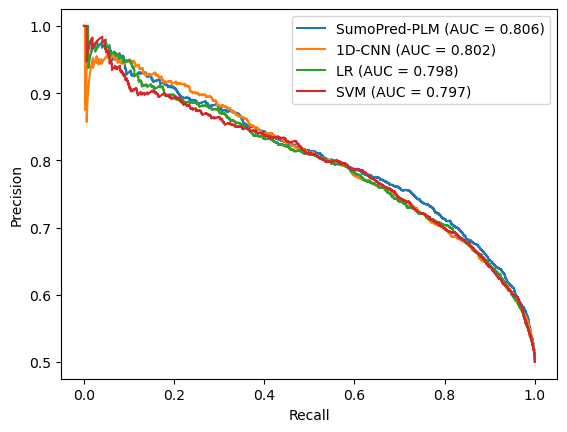

In [28]:
plt.plot(ANN_model_recall, ANN_model_precision,  label='SumoPred-PLM (AUC = %0.3f)' % ANN_model_auc)
plt.plot(One_D_CNN_model_recall, One_D_CNN_model_precision,  label='1D-CNN (AUC = %0.3f)' % One_D_CNN_model_auc)
plt.plot(lr_model_recall, lr_model_precision,  label='LR (AUC = %0.3f)' % lr_model_auc)
plt.plot(svm_model_recall, svm_model_precision,  label='SVM (AUC = %0.3f)' % svm_model_auc)


# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.savefig('SumoPred-PLM_CD_HIT_Sumoylation_PR_Curve.png', dpi=350, bbox_inches='tight')
plt.show()